## Expresiones Regulares
-----------------------------------

Las expresiones regulares, también conocidas como 'regex' o 'regexp', son patrones de búsqueda definidos con una sintaxis formal. Siempre que sigamos sus reglas, podremos realizar búsquedas simples y avanzadas, que utilizadas en conjunto con otras funcionalidades, las vuelven una de las opciones más útiles e importantes de cualquier lenguaje.



<center><img src='./img/regex.PNG'></center>

In [1]:
import re

**Métodos Básicos**

- **search**: busca un patrón en otra cadena

In [2]:
texto = "En esta cadena se encuentra una palabra mágica"

re.search('mágica', texto)

<re.Match object; span=(40, 46), match='mágica'>

Como vemos, al realizar la búsqueda lo que nos encontramos es un objeto de tipo Match (encontrado), en lugar un simple True o False.


In [3]:
palabra = "mágica"

encontrado = re.search(palabra,  texto)

if encontrado:
    print("Se ha encontrado la palabra:", palabra)
else:
    print("No se ha encontrado la palabra:", palabra)

Se ha encontrado la palabra: mágica


Sin embargo, volviendo al objeto devuelto de tipo Match, éste nos ofrece algunas opciones interesantes.

In [4]:
# Posición donde empieza la coincidencia
print( encontrado.start() ) 
# Posición donde termina la coincidencia
print( encontrado.end() )  
# Tupla con posiciones donde empieza y termina la coincidencia
print( encontrado.span() )   
# Cadena sobre la que se ha realizado la búsqueda
print( encontrado.string )

40
46
(40, 46)
En esta cadena se encuentra una palabra mágica


- **findall**: busca todas las coincidencias en una cadena

In [5]:
# re.findall(r'regex','string')

texto= "Love #movies! I had fun yesterday going to the #movies"

re.findall(r"#movies", texto)

['#movies', '#movies']

- **split**: divide una cadena de texto según un patrón

In [6]:
# re.split(r'regex', 'string')
texto="Nice Place to eat! I'll come back! Excellent meat!"

re.split(r"!", texto)

['Nice Place to eat', " I'll come back", ' Excellent meat', '']

- **sub**: substituye parte de un texto por otro

In [7]:
# re.sub(r'regex', 'sub' , 'string')

texto = "I have a yellow car and a yellow house in a yellow neighborhood"

sub = 'nice'

re.sub(r"yellow", sub ,texto)

'I have a nice car and a nice house in a nice neighborhood'

**Metacarácteres**

Permite realizar búsquedas de patrones con carácterísticas especiales

<img src='./img/codigo_escapado.PNG'>

In [9]:
texto = "The winners are: User9, UserN, User8,UserÑ , User!"

# encontrando valores de User[num] en texto
patron = r"User\d"
print(re.findall(patron, texto))

# encontrando valores de User[letra] en texto
print(re.findall(r"User\D", texto))

print(re.findall(r"User\w", texto))

['User9', 'User8']
['UserN', 'UserÑ', 'User!']
['User9', 'UserN', 'User8', 'UserÑ']


In [15]:
re.findall(r"User[0-9a-zA-Z!]", texto) # recoge letras del ingles

['User9', 'UserN', 'User8', 'User!']

**Repeticiones**

Supongamos que tenemos que realizar la validación del siguiente string

In [16]:
password = "el texto password1234"
re.search(r"password\d\d\d\d", password)

<re.Match object; span=(9, 21), match='password1234'>

Para poder facilitar esa búsqueda existen los repetidores, los cuales van a indicar un número de veces en que se repita un carácter o metacarácter en específico.

- Con número de repeticiones fijo <code>{n}</code>

**n** -> indica la cantidad de veces en que se repite un caracter


In [17]:
# 
re.search(r"password\d{4}", password)

<re.Match object; span=(9, 21), match='password1234'>

**Cuantificadores**

Al igual que los repetidores nos va a indicar la cantidad de veces en que se repita cierta expresión:

- <code>+</code> : una o más veces
- <code>*</code> : cero o más veces
- <code>?</code> : cero o una vez
- <code>{n,m}</code> : al menos n veces, como máximo m veces

**nota**

<code>r"apple+"</code> : <code>+</code> aplica al la expresión de la izquierda


In [18]:
# "+" ->digitos se repiten una o más veces 
text = "Date of start: 4-3. Date of registration: 10-04 , 100-4., 4-"
re.findall(r"\d+-[0-9]+", text)

['4-3', '10-04', '100-4']

In [19]:
# "*" ->

my_string = "The concert was amazing! @ameli!a @joh&&n @mary90"
re.findall(r"@\w+\W*\w+", my_string)


['@ameli!a', '@joh&&n', '@mary90']

In [20]:
# ?
text = "The color of this image is amazing. However, the colour blue could be brighter."
re.findall(r"colou?r", text)

['color', 'colour']

In [21]:
# {n,m}

phone_number = "John: 1-966-847-3131 Michelle: 54-908-42-42424"
re.findall(r"[0-9]{1,2}-\d{3}-\d{2,3}-\d{4,}", phone_number)


['1-966-847-3131', '54-908-42-42424']

### Caracteres Especiales

- Match cualquier caracter (excepto salto de línea)  <code>.

In [22]:
my_links = "Just check out this link: www.amazingpics.com. It has amazing photos!"
re.findall(r"w{3}.+com", my_links)

['www.amazingpics.com']

- Inicio de la cadena de texto <code>^</code>
- Fin de cadena de texto <code>$</code>

In [23]:
my_string = "the 80s music was much better that the 90s"

# búsca cualquier texto de la forma 'the ..'
print(re.findall(r"the\s\d+s", my_string))
# cadena de texto inicia con 'the'
print(re.findall(r"^the\s\d+s", my_string))

['the 80s', 'the 90s']
['the 80s']


In [24]:
# cadena de texto finaliza con 'the (num)s'
re.findall(r"the\s\d+s$", my_string)

['the 90s']

- caracter de escape especial <code>\

In [25]:
my_string = "I love the music of Mr.Go. However, the sound was too loud."
# Separando texto por '.\s' -> se pretende separar por '.'
print(re.split(r".\s", my_string))

# utilizando '\'
print(re.split(r"\.\s", my_string))

['', 'lov', 'th', 'musi', 'o', 'Mr.Go', 'However', 'th', 'soun', 'wa', 'to', 'loud.']
['I love the music of Mr.Go', 'However, the sound was too loud.']


- Operador OR <code>|

In [26]:
my_string = "Elephants are the world's largest land animal! I would love to see an elephant one day"

# eligiendo entre valor 'Elephant' or 'elephant'
re.findall(r"Elephant|elephant", my_string)

['Elephant', 'elephant']

In [27]:
re.findall(r"[Ee]lephant", my_string)

['Elephant', 'elephant']

- Conjunto de caracteres <code>[]

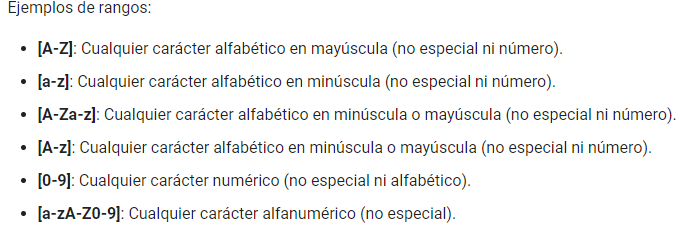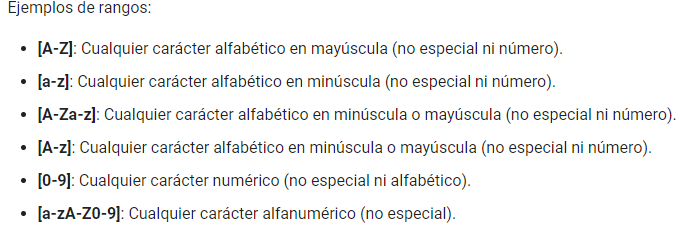<img src='./img/rango_regex.PNG'>

In [28]:
# Reemplzando carácteres especiales en texto por " "
my_string = "My&name&is#John Smith. I%live$in#London."
re.sub(r"[#$%&]", " ", my_string)

'My name is John Smith. I live in London.'

In [29]:
# [^] - transforma la expresión a negativa

my_links = "Bad website: www.99.com. Favorite site: www.hola.com"
re.findall(r"www[^0-9]+com", my_links)  # link pero que no contenga números

['www.hola.com']

## Documentación

Hay docenas y docenas de códigos especiales, si deseas echar un vistazo a todos ellos puedes consultar la documentación oficial:
- https://docs.python.org/3.5/library/re.html#regular-expression-syntax

Un resumen por parte de Google Eduactión:

- https://developers.google.com/edu/python/regular-expressions

Otro resumen muy interesante sobre el tema:

- https://www.tutorialspoint.com/python/python_reg_expressions.htm
- http://w3.unpocodetodo.info/utiles/regex.php

Un par de documentos muy trabajados con ejemplos básicos y avanzados:

- http://www.python-course.eu/python3_re.php
- http://www.python-course.eu/python3_re_advanced.php

Pruebas
- https://regex101.com/

# Problemas
--------------------------------

1. **Validacion de Numeros Telefónicos**: Cree un programa que valide si una cadena de carácteres es un numero telefonico o no
    
    - Un numero telefonico es aquel que pose 10 carácteres numericos e inicializa con los numeros 7,8 o 9
    
    Validar los casos:
    
        - 9587456281 -> YES
        - 1252478965 -> NO
        - 8F54698745 -> NO
        - 9898959398 -> YES
        - 879546242  -> NO


In [30]:
evaluar = ['9587456281','1252478965','8F54698745','9898959398','879546242']

In [43]:
regex = r"[789]{1}\d{9}"
for phone in evaluar:
    if re.match(regex, phone):
        print(f"{phone} -> YES")
        continue
    print(f"{phone} -> NO")
    

9587456281 -> YES
1252478965 -> NO
8F54698745 -> NO
9898959398 -> YES
879546242 -> NO


In [26]:
regex = r'^[789]\d{9}$' # defino el patron de busqueda

In [28]:
evaluar = ['9587456281','1252478965','8F54698745','9898959398','879546242']

for t in evaluar:
    x = re.findall(regex, t )
    
    if x:
        print(f'{t} -> Yes')
    else:
        print(f'{t} -> No')

9587456281 -> Yes
1252478965 -> No
8F54698745 -> No
9898959398 -> Yes
879546242 -> No


2. Los colores CSS se definen mediante una notación hexadecimal (HEX) para la combinación de valores de color rojo, verde y azul (RGB).
   
  Especificaciones del código de color HEX
    
    - Debe comenzar con un símbolo '#'.
    - Puede tener 3 o 6 dígitos.
    - Cada dígito está en el rango de 0 a F. (0,1,2,3,4,5,6,7,8,9,A,B,C,D,E y F).
    - las letras pueden ser minúsculas. (a,b,c,d,e y f también son dígitos válidos).
    
   **Input:** input_regex.css carpeta src
    
   **OutPut Esperado:** #FfFdF8, #aef, #f9f9f9, #fff, #ABC, #fff
    
   **Explicacion:** #BED y #Cab satisfacen los criterios pero estos son usados como selectores.
    

In [47]:
# leyendo informacion de archivo
import os
os.path.isfile('./src/input_regex.css')

True

In [60]:
path = './src/input_regex.css'

with open(path) as f:
    texto = f.read()

In [61]:
print(texto)

11
#BED
{
    color: #FfFdF8; background-color:#aef;
    font-size: 123px;
    background: -webkit-linear-gradient(top, #f9f9f9, #fff);
}
#Cab
{
    background-color: #ABC;
    border: 2px dashed #fff;
}  


In [62]:
# generando la busqueda de patrones

In [81]:
regex = r"#[0-9A-Fa-f]{3,6}\n+"

In [82]:
no_son = re.findall(regex,texto)

In [83]:
regex = r"#[0-9A-Fa-f]{3,6}"

In [84]:
si_son = re.findall(regex,texto)

In [85]:

for e in no_son:
    si_son.remove(e.strip())

In [86]:
si_son

['#FfFdF8', '#aef', '#f9f9f9', '#fff', '#ABC', '#fff']

In [ ]:
#FfFdF8, #aef, #f9f9f9, #fff, #ABC, #fff